# Extended Data Figure 2

![title](../assets/EDFig2.png)

In [5]:
%load_ext autoreload
%autoreload 2

import sys
import logging
from pathlib import Path
from itertools import combinations

logging.getLogger("matplotlib.font_manager").disabled = True

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import common

sys.path.append('./prepare_data')

DATA_PATH = Path(
    "../data"
)
EXPORT_PATH = Path(
    "../results/EDFigure2"
)
EXPORT_PATH.mkdir(exist_ok=True, parents=True)

FIGSIZE = {'width': 1.2, 'length': 0.9}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
all_positions_airpuff = common.load_data(DATA_PATH / "EDFig2_airpuff.pkl")
all_positions_opto = common.load_data(DATA_PATH / "EDFig2_optogenetics.pkl")

## Panel A: occupancy of antennal key points

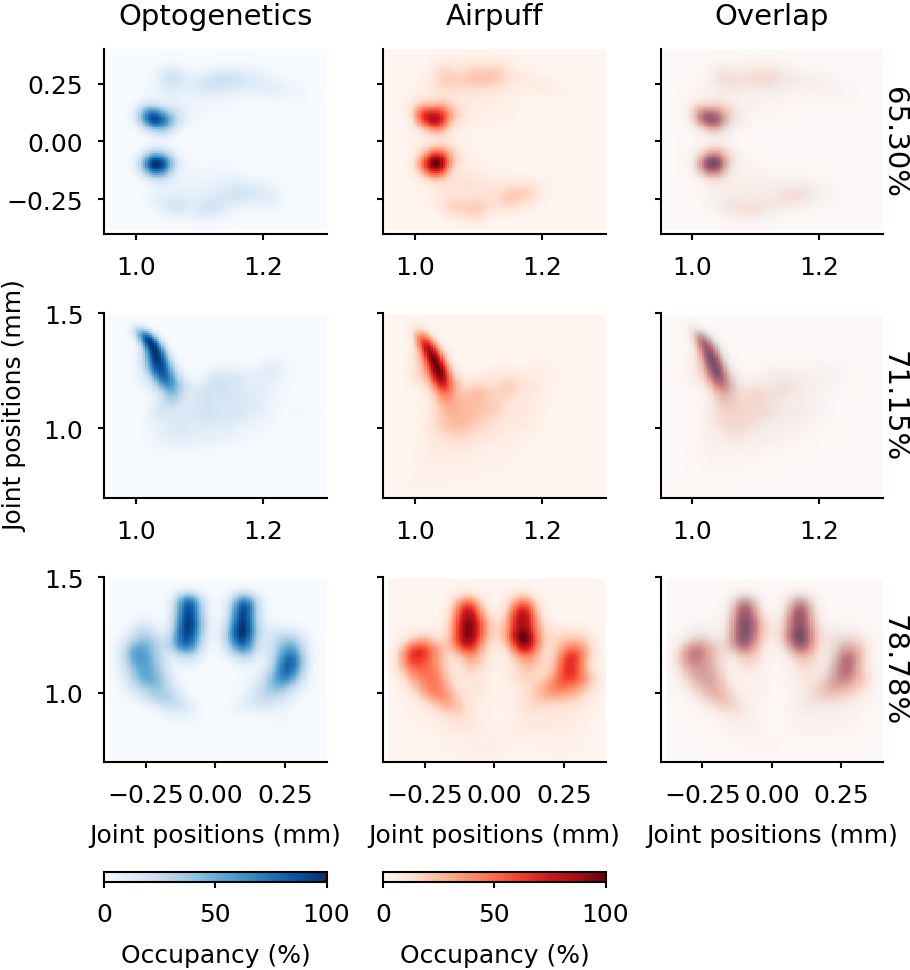

In [8]:
data_all = {}
boundaries = []


limits = {
    "x": [0.95, 1.3],
    "y": [-0.4, 0.4],
    "z": [0.7, 1.5],
}

joint_name = {
    "base": "antennal joint",
    "edge": "antennal tip",
    "Tarsus": "tibia-tarsus joint",
}

for x, y in combinations(["x", "y", "z"], 2):

    data1, data2 = common.convert_dict_to_array(
        all_positions_opto,
        all_positions_airpuff,
        [
            f"Pose_R_head_Antenna_base_{x}",
            f"Pose_R_head_Antenna_edge_{x}",
            f"Pose_L_head_Antenna_base_{x}",
            f"Pose_L_head_Antenna_edge_{x}",
        ],
        [
            f"Pose_R_head_Antenna_base_{y}",
            f"Pose_R_head_Antenna_edge_{y}",
            f"Pose_L_head_Antenna_base_{y}",
            f"Pose_L_head_Antenna_edge_{y}",
        ],
    )
    kde1_vals, kde2_vals, x_g, y_g = common.calculate_kde(data1, data2)
    overlap = common.calculate_overlap(kde1_vals, kde2_vals)

    data_all[x + y] = (
        kde1_vals,
        kde2_vals,
        overlap,
        x_g,
        y_g,
        limits[x],
        limits[y],
    )

with plt.style.context("./config.mplstyle"):

    common.plot_2d_histograms_3x3(
        data_all,
        figsize=(3.1, 3.3),
        titles=[
            f"Optogenetics",
            f"Airpuff",
            f"Overlap",
            f"2D occupancy histograms of the head",
        ],
        export_path=EXPORT_PATH / "EDFigure2_OPAP_antenna_2d_histograms.png",
    )

## Panels B, C, D: occupancy of coxa-trochanter, femur-tibia, and tibia-tarsus foreleg joints

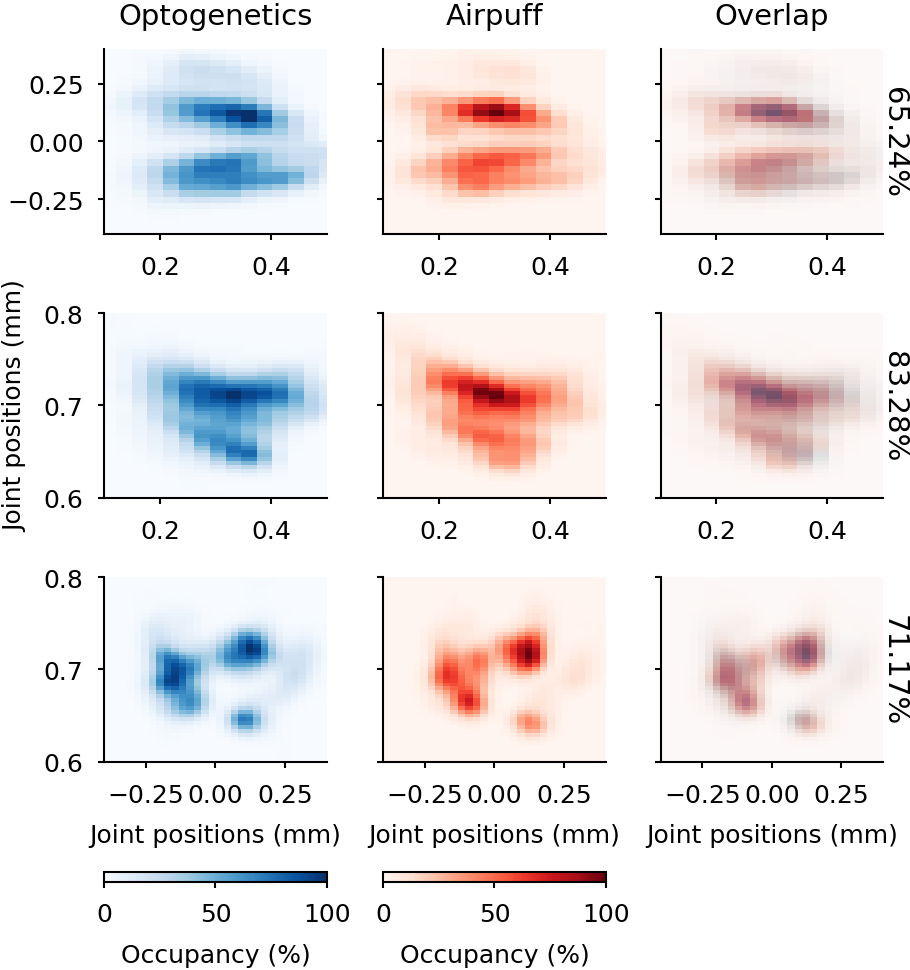

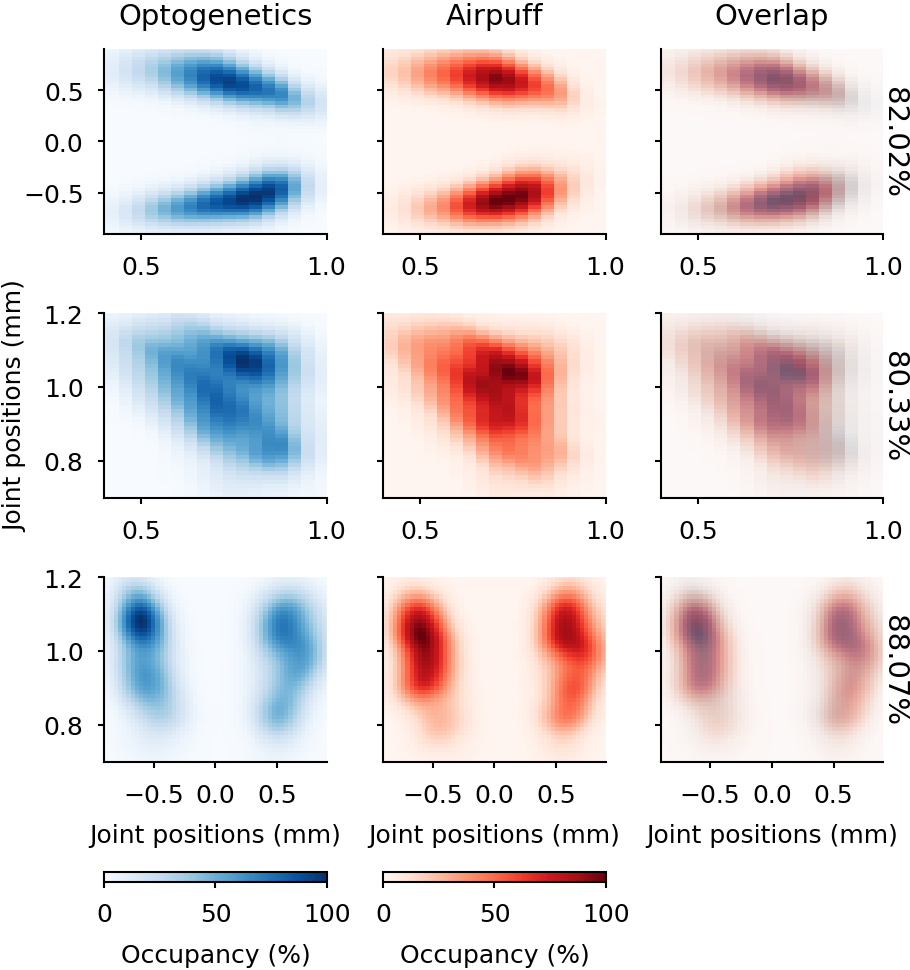

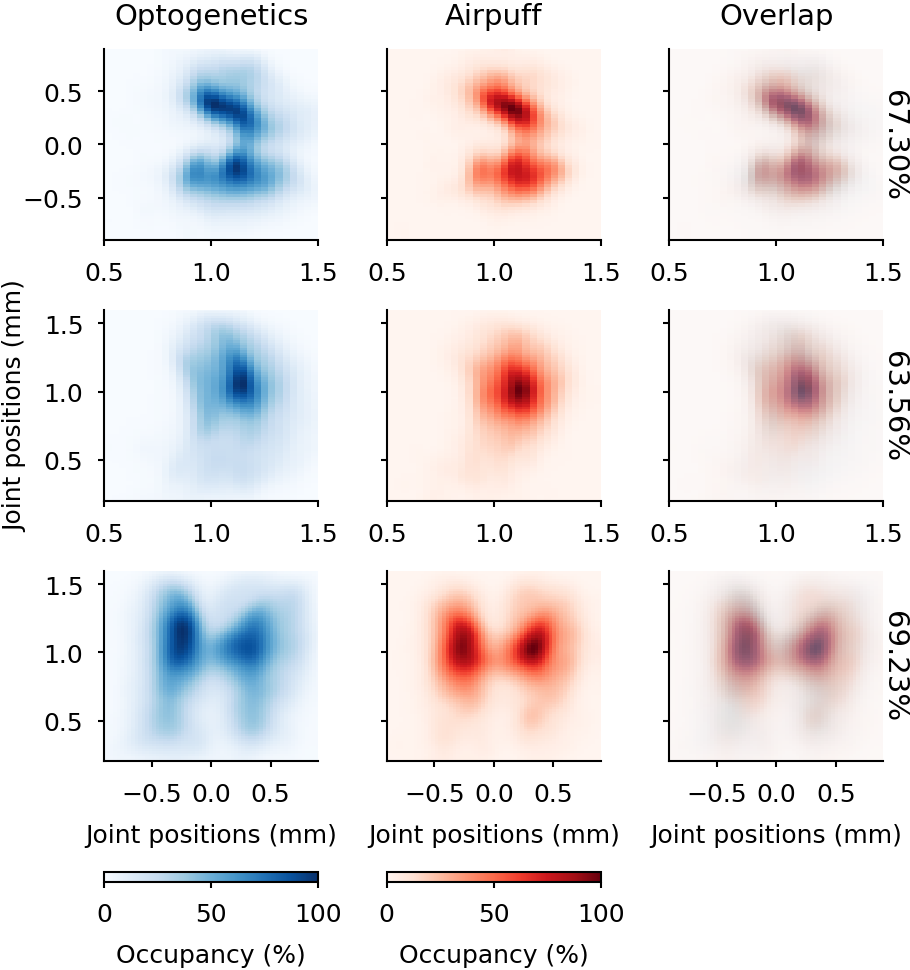

In [10]:
limits = {
    "Femur": {
        "x": [0.1, 0.5],
        "y": [-0.4, 0.4],
        "z": [0.6, 0.8],
    },
    "Tibia": {
        "x": [0.4, 1],
        "y": [-0.9, 0.9],
        "z": [0.7, 1.2],
    },
    "Tarsus": {
        "x": [0.5, 1.5],
        "y": [-0.9, 0.9],
        "z": [0.2, 1.6],
    },
}

joint_name = {
    "Femur": "coxa-trochanter joint",
    "Tibia": "femur-tibia joint",
    "Tarsus": "tibia-tarsus joint",
}

for leg_segment in ["Femur", "Tibia", "Tarsus"]:
    data_all = {}
    boundaries = []
    for x, y in combinations(["x", "y", "z"], 2):

        data1, data2 = common.convert_dict_to_array(
            all_positions_opto,
            all_positions_airpuff,
            [
                f"Pose_RF_{leg_segment}_{x}",
                f"Pose_LF_{leg_segment}_{x}",
            ],
            [
                f"Pose_RF_{leg_segment}_{y}",
                f"Pose_LF_{leg_segment}_{y}",
            ],
        )
        kde1_vals, kde2_vals, x_g, y_g = common.calculate_kde(data1, data2)
        overlap = common.calculate_overlap(kde1_vals, kde2_vals)

        data_all[x + y] = (
            kde1_vals,
            kde2_vals,
            overlap,
            x_g,
            y_g,
            limits[leg_segment][x],
            limits[leg_segment][y],
        )

    with plt.style.context("./config.mplstyle"):

        common.plot_2d_histograms_3x3(
            data_all,
            figsize=(3.1, 3.3),
            titles=[
                f"Optogenetics",
                f"Airpuff",
                f"Overlap",
                f"2D occupancy histograms of {joint_name[leg_segment]}",
            ],
            export_path=EXPORT_PATH / f"EDFigure2_OPAP_{leg_segment}_2d_histograms.png",
        )